
# Logistic Regression and Gradient Descent

## Logistic Regression Model

Logistic regression is a classification algorithm that predicts a probability for each possible class. Unlike linear regression, which predicts continuous values, logistic regression models the probability that a given input belongs to a particular class (usually binary classification).

### Hypothesis Function

In logistic regression, the hypothesis function is defined using the sigmoid (logistic) function:

$$
h_{w,b}(x) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + \dots + w_nx_n + b)}} = \frac{1}{1 + e^{-(w^T x + b)}}
$$

Where:
- $w = [w_1, w_2, \dots, w_n]$ are the weights (coefficients) for each feature.
- $b$ is the bias (y-intercept).
- $x = [x_1, x_2, \dots, x_n]$ is the feature vector.
- $h_{w,b}(x)$ represents the probability that the output is 1 (i.e., $P(y=1|x)$).

The sigmoid function outputs values between 0 and 1, which can be interpreted as probabilities. Based on a threshold (commonly 0.5), the predicted class is determined:
- If $h_{w,b}(x) \geq 0.5$, predict $y = 1$
- If $h_{w,b}(x) < 0.5$, predict $y = 0$

### Cost Function (Log-Loss)

For logistic regression, the cost function is derived from the likelihood of the observed data, using the binary cross-entropy (log-loss):

$$
J(w,b) = - \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(h_{w,b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{w,b}(x^{(i)})) \right)
$$

Where:
- $m$ is the number of training examples.
- $x^{(i)}$ is the feature vector for the $i$-th training example.
- $y^{(i)}$ is the $i$-th target output, which is either 0 or 1.
- $h_{w,b}(x^{(i)})$ is the predicted probability for the $i$-th example.

The cost function penalizes wrong predictions based on the confidence of the predictions.

### Gradient Descent for Logistic Regression

To minimize the cost function $J(w,b)$, we apply gradient descent similar to linear regression. The update rules for the parameters are:

$$
w_j = w_j - \alpha \frac{\partial}{\partial w_j} J(w,b) \quad \text{for } j = 1, 2, \dots, n
$$

$$
b = b - \alpha \frac{\partial}{\partial b} J(w,b)
$$

#### Partial Derivatives

The partial derivatives of the cost function $J(w,b)$ with respect to the parameters $w_j$ and $b$ are:

$$
\frac{\partial}{\partial w_j} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \left( h_{w,b}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial}{\partial b} J(w,b) = \frac{1}{m} \sum_{i=1}^{m} \left( h_{w,b}(x^{(i)}) - y^{(i)} \right)
$$

These derivatives are used to update the weights and bias iteratively using gradient descent.

### Logistic Regression Algorithm

1. **Initialize** the parameters $w = [w_1, w_2, \dots, w_n]$ and $b$ to small random values or zeros.
2. **For each iteration** (until convergence):
   - Compute the hypothesis $h_{w,b}(x^{(i)})$ for all training examples.
   - Calculate the cost function $J(w,b)$.
   - Compute the gradients of $J(w,b)$ with respect to each $w_j$ and $b$.
   - Update the parameters $w_j$ and $b$ using the gradient descent update rules.
3. **Predict** the class label for a new input $x$ based on the value of $h_{w,b}(x)$.


In [1]:
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [7]:
class LogisticRegression:
    def __init__(self, x_train, y_train):
        """
        Initialize the logistic regression model with training data.
        
        Parameters:
        - x_train: Matrix of input features.
        - y_train: Array of corresponding target values.
        """
        
        self.x_train = x_train
        self.y_train = y_train
        self.b_in = 0
        self.m = len(y_train) # Number of training examples
        self.w_in = np.zeros(x_train.shape[0]) # Initialize weights to zero
        
    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        
        Parameters:
        - z: Input to the sigmoid function.
        
        Returns:
        - Sigmoid of z.
        """
        
        return 1 / (1 + np.exp(-z))
        
    def cost_function(self, w, b):
        """
        Compute the cost function for the logistic regression model.
        
        The cost function is defined as: J(w, b) = -1/m * sum(y * log(h(x)) + (1 - y) * log(1 - h(x)))
        
        Parameters:
        - w: Array of weights.
        - b: Bias term.
        
        Returns:
        - Cost function value.
        """
        
        total_cost = 0
        for i in range(self.m):
            x = self.x_train[:, i]
            y = self.y_train[i]
            h = self.sigmoid(np.dot(w, x) + b)
            total_cost += y * np.log(h) + (1 - y) * np.log(1 - h)
            
        return -1/self.m * total_cost
    
    
    def gradient_w(self, w, b):
        """
        Compute the gradient of the cost function with respect to the weights.
        
        Parameters:
        - w: Array of weights.
        - b: Bias term.
        
        Returns:
        - Gradient of the cost function with respect to the weights.
        """
        
        grad = np.zeros(w.shape)
        for i in range(self.m):
            x = self.x_train[:, i]
            y = self.y_train[i]
            h = self.sigmoid(np.dot(w, x) + b)
            grad += (h - y) * x
            
        return 1/self.m * grad
    
    def gradient_b(self, w, b):
        """
        Compute the gradient of the cost function with respect to the bias term.
        
        Parameters:
        - w: Array of weights.
        - b: Bias term.
        
        Returns:
        - Gradient of the cost function with respect to the bias term.
        """
        
        grad = 0
        for i in range(self.m):
            x = self.x_train[:, i]
            y = self.y_train[i]
            h = self.sigmoid(np.dot(w, x) + b)
            grad += h - y
            
        return 1/self.m * grad
    
    def gradient_descent(self, learning_rate, num_iterations):
        """
        Perform gradient descent to optimize the weights and bias term.
        
        Parameters:
        - learning_rate: Learning rate for gradient descent.
        - num_iterations: Number of iterations to perform.
        """
        
        w_optimised = copy.deepcopy(self.w_in) # Initialize optimised weights
        
        b_optimised = self.b_in # Initialize optimised bias term
        
        for i in range(num_iterations):
            w_grad = self.gradient_w(w_optimised, b_optimised)
            b_grad = self.gradient_b(w_optimised, b_optimised)
            
            # Update weights and bias term
            temp_w = w_optimised - learning_rate * w_grad
            b_optimised -= learning_rate * b_grad
            
            # Update weights
            w_optimised = temp_w
            b_optimised = b_optimised
            
            # Print the progrss every 100 iterations
            if i % 10 == 0:
                print(f'Iteration: {i}, Cost: {self.cost_function(w_optimised, b_optimised)}')
                # Plot the cost function value for each iteration
                plt.scatter(i, self.cost_function(w_optimised, b_optimised))
                
        return w_optimised, b_optimised
        
    

Iteration: 0, Cost: 0.5749826171178102
Iteration: 10, Cost: 0.5156406482643632
Iteration: 20, Cost: 0.49511745813877983
Iteration: 30, Cost: 0.47603443778747034
Iteration: 40, Cost: 0.45828273642405243
Iteration: 50, Cost: 0.4417626561132192
Iteration: 60, Cost: 0.42637924731654114
Iteration: 70, Cost: 0.4120429565408927
Iteration: 80, Cost: 0.3986699903806345
Iteration: 90, Cost: 0.3861824549311052
Iteration: 100, Cost: 0.3745083230701004
Iteration: 110, Cost: 0.3635812754790506
Iteration: 120, Cost: 0.3533404538269447
Iteration: 130, Cost: 0.3437301571337029
Iteration: 140, Cost: 0.3346995055346164
Iteration: 150, Cost: 0.32620208976718235
Iteration: 160, Cost: 0.3181956197850255
Iteration: 170, Cost: 0.31064158193961955
Iteration: 180, Cost: 0.3035049110632157
Iteration: 190, Cost: 0.29675368141189296
Iteration: 200, Cost: 0.29035881865742375
Iteration: 210, Cost: 0.28429383383053425
Iteration: 220, Cost: 0.27853457921072783
Iteration: 230, Cost: 0.27305902554048206
Iteration: 240, 

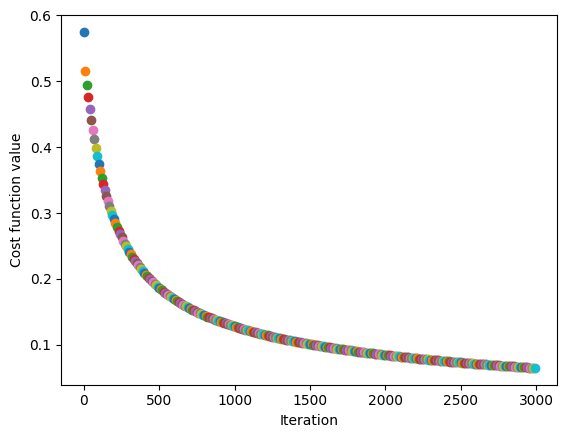

In [11]:
# Training data
x_train = np.array([[1, 2, 3, 4, 5], [1, 2, 3, 4, 5]])
y_train = np.array([0, 0, 1, 1, 1])

# Initialize the logistic regression model
logistic_regression = LogisticRegression(x_train, y_train)

# Perform gradient descent
w_optimised, b_optimised = logistic_regression.gradient_descent(learning_rate=0.1, num_iterations=3000)

# Plot the cost function value for each iteration
plt.xlabel('Iteration')
plt.ylabel('Cost function value')   
plt.show()